<a href="https://colab.research.google.com/github/Ensnor/Python-Project-by-Azzam-Gilas-Tirani/blob/main/Mutual_Fund_Analysis_%26_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indonesian investment platform startup need a DA to visualize their data and make a cluster segmentation.

## Data Description

### Users Dataset
*   User information such as user_id registration_import_datetime, user_gender, user_age 'user_occupation',
 'user_income_range',
 'referral_code_used',
 'user_income_source'
*   https://docs.google.com/spreadsheets/d/1_0VVO6HdaQVs8DZYVtogqq_EahtfLUi5DUxBjnkXeOk/edit#gid=2027504668'

### Transaction Dataset
*   Describe transaction history
*   https://docs.google.com/spreadsheets/d/1tDdOhONva3pEq86ONO3GhLUN1geWpIYsioqJafIs9Nw/edit#gid=1235425566

## User Dataset

Data Information :
- *user_id* = client ID on the platform
- *registration_import_datetime* = registration time and date at UTC+7 timezone (WIB)
- *user_gender* = user self-identified gender
- *user_age* = user self-identified age
- *user_occupation* = user self-identified job
- *user_income_range* = user self-identified income range
- *referral_code_used* = if user enter referral code during registration, the value is "used referral"; else will be Null valued
- *user_income_source* = user self-declared source of income

## Daily Balance Dataset

Data Information : :
- *user_id* = client ID on the platform
- *date* = date of the user balance
- *Saham_AUM* = AUM of equity mutual fund held by client to date
- *Saham_invested_amount* = The total price paid by client to buy equity mutual fund to date
- *Saham_transaction_amount* = Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
- *Pasar_Uang_AUM* = AUM of money market mutual fund held by client to date
- *Pasar_Uang_invested_amount* = The total price paid by client to buy money market mutual fund to date
- *Pasar_Uang_transaction_amount* = Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
- *Pendapatan_Tetap_AUM* = AUM of fixed income mutual fund held by client to date
- *Pendapatan_Tetap_invested_amount* = The total price paid by client to buy fixed income mutual fund to date
- *Pendapatan_Tetap_transaction_amount* = Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
- *Campuran_AUM* =	AUM of mixed mutual fund held by client to date
- *Campuran_invested_amount* =	The total price paid by client to buy mixed mutual fund to date
- *Campuran_transaction_amount* =	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

Definition :
-  *AUM* =	Asset Under Management. This is the market value of mutual fund held by each users every day
- *Invested Amount* =	The total price paid by client to buy mutual fund to date
- *Buy transaction* =	If transaction amount > 0
- *Sell transaction* =	If transaction amount < 0
- *Net transaction* =	Total buy transaction - total sell transaction within a period of time
- *Profit/Loss* =	The difference between AUM and Invested Amount. Example: AUM = 1500 Invested Amount = 1000 means Profit = 1500-1000 = 500. If the difference positive it's Profit, if negative Loss

# Preparation

### Libraries

In [ ]:
import pandas as pd                     #advanced data analysis, import data quickly
import numpy as np                      #mahematical operations and statistical operation
import matplotlib.pyplot as plt         #simple interactive visualization
from datetime import datetime           #manipulating dates and times
import seaborn as sns                   #visualization with many color palettes, beatifull style and many statistical plots
import plotly.express as px             #high-level interface visualization which operate variety of type of data
pd.set_option('display.float_format', lambda x: '%.2f' % x) #we set this first so the float data(decimal) only ends with 2 numbers after zero.

### Import Data

* User Dataset

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1_0VVO6HdaQVs8DZYVtogqq_EahtfLUi5DUxBjnkXeOk/edit#gid=2027504668'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then colab can import it
df = pd.read_csv(sheet_url_trf) #define df to read csv
df.head() #only show first of 5 rows (not based on shorting etc)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
df_user = df.copy() #make a copy dataframe so the original dataframe wont change if we manipulate data in the future
df_user.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


* Daily User Balance Dataset

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1tDdOhONva3pEq86ONO3GhLUN1geWpIYsioqJafIs9Nw/edit#gid=1235425566'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert spreadsheet format become CSV then colab can import it
df = pd.read_csv(sheet_url_trf) #define df to read csv
df.head() #only show first of 5 rows (not based on shorting etc)

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.00,10000000.00,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.00,10000000.00,0.00
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.00,10000000.00,0.00
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.00,10000000.00,0.00
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.00,10000000.00,0.00


In [ ]:
df_balance = df.copy() #copy original still same if any changes below
df_balance.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

# A. Data Cleaning

## User Dataset





### Handling Irrelevant Values

In [ ]:
df_user.info() #show data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


> We will cluster based on categorical data, and the'registration_import_datetime' and 'user_income_source' columns will be removed.

In [ ]:
# remove column registration_import_datetime and user_income_source
df_user.drop(['registration_import_datetime','user_income_source'], axis=1, inplace=True)
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  int64 
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   referral_code_used  5604 non-null   object
dtypes: int64(2), object(4)
memory usage: 689.8+ KB


### Handling Missing Data

In [ ]:
#Inspect value columns NaN
df_user.isna().sum()

user_id                  0
user_gender              0
user_age                 0
user_occupation          0
user_income_range        0
referral_code_used    9108
dtype: int64

In [ ]:
# Fill in null data in referral_code_used column with not used referral
df_user['referral_code_used'].fillna('not used referral', inplace=True)

In [ ]:
# Check number of NaN Value after treatment
df_user.isna().sum()

user_id               0
user_gender           0
user_age              0
user_occupation       0
user_income_range     0
referral_code_used    0
dtype: int64

> There is no more missing value

### Removing Duplicates

In [ ]:
# check number of duplicated data in user level
df_user['user_id'].duplicated().sum()

0

> There is no duplicated data

### Convert Data Type

Data type of 'user_id' is int64, I have changed it to string because it will not be aggregated.

In [ ]:
# Merubah tipe data
df_user['user_id'] = df_user['user_id'].astype(str)

# Check informasi data
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  object
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   referral_code_used  14712 non-null  object
dtypes: int64(1), object(5)
memory usage: 689.8+ KB


### Handling Typos

In [ ]:
# check unique values
ls_dim = ['user_gender','user_occupation','user_income_range','referral_code_used'] #list kolom dimensi

for dimension in ls_dim :
  print(df_user[dimension].value_counts(),'\n')

Male      8977
Female    5735
Name: user_gender, dtype: int64 

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64 

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64 

not used referral    9108
used referral        5604
Name: referral_code_used, dtype: int64 



In [ ]:
# check unique values
df_user['user_age'].value_counts()

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64

tidak ditemukan typo pada User dataset

### Handling Outlier

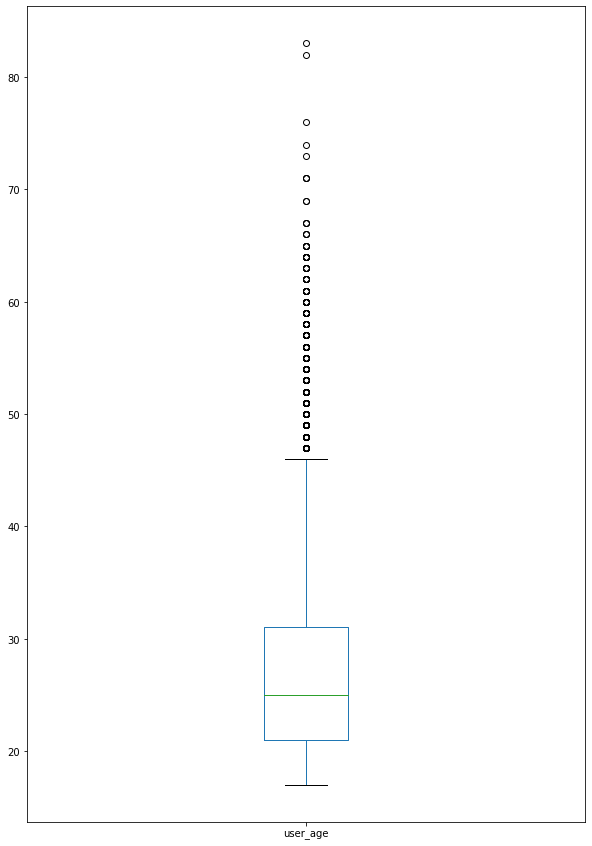

In [ ]:
# Deteksi outlier menggunakan boxplot
df_user.boxplot(column=['user_age'], fontsize = 10, rot=0, grid=False, figsize=(10,15),vert=True)

The boxplot approach revealed that many 'user_age' data exceeded the upper limit. As a result, the 'Upper Fence' and 'Lower Fence' must be determined manually.

In [ ]:
# Find Q1, Q3, IQR
Q1 = df_user['user_age'].quantile(0.25)
Q3 = df_user['user_age'].quantile(0.75)
IQR = Q3 - Q1

# Find Lower Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)
print('Lower Fence:',boxplot_min)
print('Upper Fence:',boxplot_max)

Q1: 21.0
Q3: 31.0
IQR: 10.0
Lower Fence: 6.0
Upper Fence: 46.0


In [ ]:
# Filter value that < Bottom fence and > Upper fence
filter_min = df_user['user_age'] < boxplot_min
filter_max = df_user['user_age'] > boxplot_max

# Show data outlier that < Bottom fence and > Upper fence
df_user_outlier = df_user.loc[filter_min | filter_max]
df_user_outlier

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used
0,162882,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used referral
1,3485491,Female,55,Others,> Rp 50 Juta - 100 Juta,not used referral
2,1071649,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used referral
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral
4,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral
...,...,...,...,...,...,...
14707,4352347,Male,49,Swasta,> Rp 100 Juta - 500 Juta,not used referral
14708,4288026,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral
14709,4286882,Female,49,Swasta,> Rp 100 Juta - 500 Juta,not used referral
14710,4396739,Male,49,Swasta,> Rp 100 Juta - 500 Juta,not used referral


In [ ]:
# Check data distribution of outlier
df_user_outlier['user_age'].value_counts()

49    82
48    75
47    68
51    58
52    57
50    48
54    47
53    38
55    34
56    32
57    24
58    15
59    13
60    10
64     9
61     8
62     7
63     6
65     5
67     3
71     3
66     3
69     2
74     1
83     1
82     1
76     1
73     1
Name: user_age, dtype: int64

In the 'user_age' data, **652** outliers with ages ranging from 47 to 83 years were discovered. The age range of **74-83 years was removed** after an examination of the age distribution.

In [ ]:
df_user_clean = df_user[(df_user['user_age'] < 74)]
df_user_clean

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used
0,162882,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,not used referral
1,3485491,Female,55,Others,> Rp 50 Juta - 100 Juta,not used referral
2,1071649,Male,50,Swasta,Rp 10 Juta - 50 Juta,not used referral
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral
4,3802293,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral
...,...,...,...,...,...,...
14707,4352347,Male,49,Swasta,> Rp 100 Juta - 500 Juta,not used referral
14708,4288026,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral
14709,4286882,Female,49,Swasta,> Rp 100 Juta - 500 Juta,not used referral
14710,4396739,Male,49,Swasta,> Rp 100 Juta - 500 Juta,not used referral


In [ ]:
# # drop outlier
# df_user_clean = df_user.loc[~(filter_min | filter_max)]
# df_user_clean # show data after cleaning

## Daily User Balance Dataset

### Handling Missing Data

In [ ]:
# Inspect number of NaN Value
df_balance.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

Many empty data points were discovered in this dataset; it would be more prudent to consider filling in the blank values rather than removing the empty dataset.

In [ ]:
# Fill in NaN data with 0
df_balance.fillna(0, inplace=True)

# Check number of NaN after treatment
df_balance.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

There is no more missing value

### Removing Duplicates

In [ ]:
# check duplicated data
df_balance[['user_id','date']].duplicated().sum()

0

There is no duplicated data

### Convert Data Type

In [ ]:
# Convert Integer value to string
df_balance['user_id'] = df_balance['user_id'].astype(str)

# Convert String to Datetime
df_balance['date'] = pd.to_datetime(df_balance['date'])

# Check data information after convert data type
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

### Handling Irrelevant Values

We want to remove data that have 0 value in all numerical column (AUM, invested amount, and transaction amount)

In [ ]:
# Add new temporary column for easy data filtering
df_balance['Total_AUM'] = df_balance['Saham_AUM'] + df_balance['Pasar_Uang_AUM'] + df_balance['Pendapatan_Tetap_AUM'] + df_balance['Campuran_AUM']
df_balance['Total_transaction'] = df_balance['Saham_transaction_amount'] + df_balance['Pasar_Uang_transaction_amount'] + df_balance['Pendapatan_Tetap_transaction_amount'] + df_balance['Campuran_transaction_amount']
df_balance

# Make filtering condition with 0 value 
filter_bal = df_balance['Total_AUM'] == 0
filter_trans = df_balance['Total_transaction'] == 0

# Show data that contains all null
df_bal_null = df_balance.loc[(filter_bal & filter_trans)]
df_bal_null

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
103,61414,2021-08-16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
104,61414,2021-08-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
105,61414,2021-08-18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
106,61414,2021-08-19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
107,61414,2021-08-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158784,4161634,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
158792,4162795,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
158797,4163348,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
158802,4164476,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


There are 30,588 rows that have no value at all, therefore the decision was made to remove them.

In [ ]:
# Show data after treatment
df_balance = df_balance.loc[~(filter_bal & filter_trans)]
df_balance

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
0,50701,2021-08-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10132277.00,10000000.00,0.00,10132277.00,0.00
1,50701,2021-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10206945.00,10000000.00,0.00,10206945.00,0.00
2,50701,2021-09-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9956556.00,10000000.00,0.00,9956556.00,0.00
3,50701,2021-09-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9914858.00,10000000.00,0.00,9914858.00,0.00
4,50701,2021-09-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10016360.00,10000000.00,0.00,10016360.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,175081.00,175000.00,0.00,0.00,0.00,0.00,175081.00,0.00
158807,4165132,2021-09-30,0.00,0.00,0.00,10001.00,10000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10001.00,0.00
158808,4165630,2021-09-30,41625.00,40000.00,0.00,10001.00,10000.00,0.00,49869.00,50000.00,0.00,0.00,0.00,0.00,101495.00,0.00
158809,4165704,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,9987.00,10000.00,0.00,0.00,0.00,0.00,9987.00,0.00


There is no more irrelevant value

### Handling Outlier

#### **Daily Transaction**

In [ ]:
df_out = df_balance.copy()

In [ ]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128223 entries, 0 to 158810
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              128223 non-null  object        
 1   date                                 128223 non-null  datetime64[ns]
 2   Saham_AUM                            128223 non-null  float64       
 3   Saham_invested_amount                128223 non-null  float64       
 4   Saham_transaction_amount             128223 non-null  float64       
 5   Pasar_Uang_AUM                       128223 non-null  float64       
 6   Pasar_Uang_invested_amount           128223 non-null  float64       
 7   Pasar_Uang_transaction_amount        128223 non-null  float64       
 8   Pendapatan_Tetap_AUM                 128223 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     128223 non-null  float64       
 

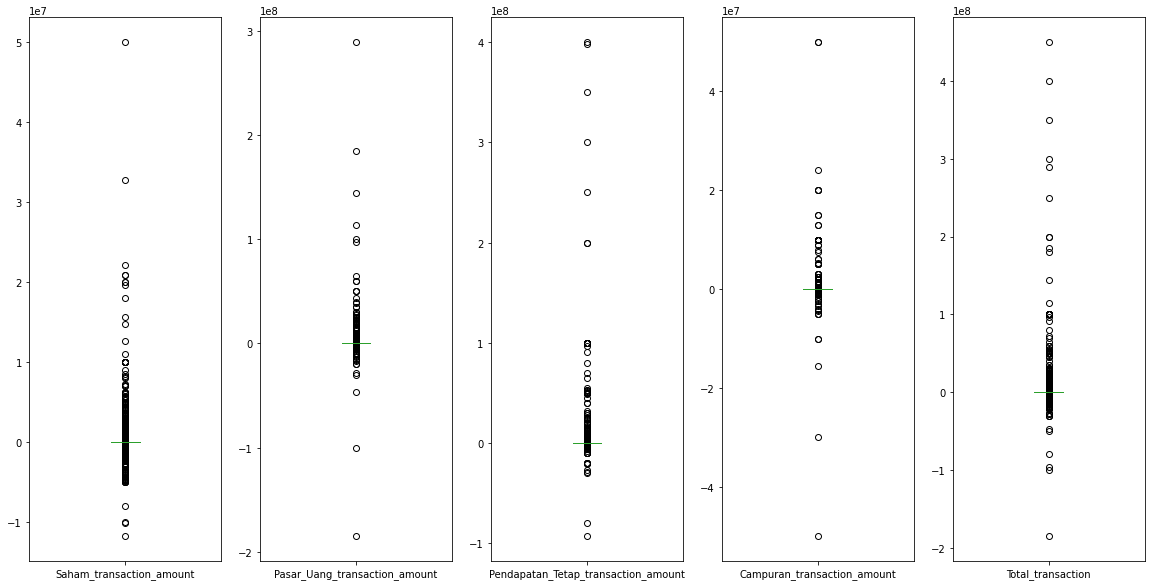

In [ ]:
ls_num = ['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount','Total_transaction']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,10))

# for 0 (i) , trans (el)
for i, el in enumerate (ls_num):
    a = df_balance.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

> From the boxplot above, it is quite difficult to see the distribution of outliers. Therefore, the calculation of IQR is needed to validate the values of 'Upper Fence' and 'Lower Fence'.

In [ ]:
# Filter without 0 value
filter_saham = df_out.loc[df_out['Saham_transaction_amount'] !=0]
filter_pu = df_out.loc[df_out['Pasar_Uang_transaction_amount'] !=0]
filter_pt = df_out.loc[df_out['Pendapatan_Tetap_transaction_amount'] !=0]
filter_camp = df_out.loc[df_out['Campuran_transaction_amount'] !=0]
filter_total = df_out.loc[df_out['Total_transaction'] !=0]

# Find Q1, Q3, IQR
Q1_saham = filter_saham['Saham_transaction_amount'].quantile(0.25)
Q3_saham = filter_saham['Saham_transaction_amount'].quantile(0.75)
IQR_saham = Q3_saham - Q1_saham

Q1_pu = filter_pu['Pasar_Uang_transaction_amount'].quantile(0.25)
Q3_pu = filter_pu['Pasar_Uang_transaction_amount'].quantile(0.75)
IQR_pu = Q3_pu - Q1_pu

Q1_pt = filter_pt['Pendapatan_Tetap_transaction_amount'].quantile(0.25)
Q3_pt = filter_pt['Pendapatan_Tetap_transaction_amount'].quantile(0.75)
IQR_pt = Q3_pt - Q1_pt

Q1_campuran = filter_camp['Campuran_transaction_amount'].quantile(0.25)
Q3_campuran = filter_camp['Campuran_transaction_amount'].quantile(0.75)
IQR_campuran = Q3_campuran - Q1_campuran

Q1_total = filter_total['Total_transaction'].quantile(0.25)
Q3_total = filter_total['Total_transaction'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Find Lower Fence and Upper Fence
lower_saham = Q1_saham - 1.5 * IQR_saham
upper_saham = Q3_saham + 1.5 * IQR_saham

lower_pu = Q1_pu - 1.5 * IQR_pu
upper_pu = Q3_pu + 1.5 * IQR_pu

lower_pt = Q1_pt - 1.5 * IQR_pt
upper_pt = Q3_pt + 1.5 * IQR_pt

lower_campuran = Q1_campuran - 1.5 * IQR_campuran
upper_campuran = Q3_campuran + 1.5 * IQR_campuran

lower_total = Q1_total - 1.5 * IQR_total
upper_total = Q3_total + 1.5 * IQR_total

#Show the calculation
ls_stat = ['Q1', 'Q3', 'IQR', 'lower_fence', 'upper_fence']
ls_saham = [Q1_saham, Q3_saham, IQR_saham, lower_saham, upper_saham]
ls_pasar_uang = [Q1_pu, Q3_pu, IQR_pu, lower_pu, upper_pu]
ls_pend_tetap = [Q1_pt, Q3_pt, IQR_pt, lower_pt, upper_pt]
ls_campuran = [Q1_campuran, Q3_campuran, IQR_campuran, lower_campuran, upper_campuran]
ls_total = [Q1_total, Q3_total, IQR_total, lower_total, upper_total]

# make dataframe
pd.DataFrame({'descriptive' : ls_stat,
              'stocks' : ls_saham,
              'money_market' : ls_pasar_uang,
              'bond' : ls_pend_tetap,
              'mixed' : ls_campuran,
              'total' : ls_total})

,descriptive,stocks,money_market,bond,mixed,total
0,Q1,-40000.00,-10000.00,-20000.00,-100000.00,-10000.00
1,Q3,150110.00,100000.00,170000.00,2000000.00,250000.00
2,IQR,190110.00,110000.00,190000.00,2100000.00,260000.00
3,lower_fence,-325165.00,-175000.00,-305000.00,-3250000.00,-400000.00
4,upper_fence,435275.00,265000.00,455000.00,5150000.00,640000.00


In [ ]:
# Check Max values 
df_out.nlargest(15, 'Total_transaction')

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
26268,3662093,2021-09-06,0.00,0.00,0.00,40020302.00,40000000.00,39000000.00,400309140.00,400000000.00,398000000.00,20010364.00,20000000.00,13000000.00,460339806.00,450000000.00
50193,3764129,2021-08-16,0.00,0.00,0.00,0.00,0.00,0.00,700696559.00,700000000.00,400000000.00,0.00,0.00,0.00,700696559.00,400000000.00
151933,4056373,2021-09-28,0.00,0.00,0.00,450325149.00,450000000.00,0.00,450149847.00,450000000.00,350000000.00,0.00,0.00,0.00,900474996.00,350000000.00
28819,3726685,2021-09-01,0.00,0.00,0.00,0.00,0.00,0.00,650556046.00,650000751.00,300000000.00,0.00,0.00,0.00,650556046.00,300000000.00
111060,3902455,2021-09-03,0.00,0.00,0.00,867958637.00,867600000.00,289200000.00,0.00,0.00,0.00,0.00,0.00,0.00,867958637.00,289200000.00
143784,4010645,2021-09-20,4593713.00,4660000.00,0.00,100145.00,100000.00,0.00,266537792.00,266340000.00,250000000.00,0.00,0.00,0.00,271231650.00,250000000.00
50198,3764129,2021-08-23,0.00,0.00,0.00,0.00,0.00,0.00,901831070.00,900000000.00,200000000.00,0.00,0.00,0.00,901831070.00,200000000.00
134962,3976699,2021-09-20,0.00,0.00,0.00,0.00,0.00,0.00,450563347.00,450000000.00,200000000.00,989958.00,1000000.00,0.00,451553305.00,200000000.00
37979,3744696,2021-08-11,5073124.00,5000000.00,0.00,185099058.00,185075955.00,185075955.00,220054322.00,220000000.00,0.00,10029725.00,10000000.00,0.00,420256229.00,185075955.00
36495,3742422,2021-08-13,18573755.00,18520000.00,18000000.00,64927013.00,64900000.00,64800000.00,97481331.00,97580000.00,97200000.00,0.00,0.00,0.00,180982099.00,180000000.00


In [ ]:
# Check Min values 
df_out.nsmallest(15, 'Total_transaction')

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
37978,3744696,2021-08-10,0.00,0.00,0.00,0.00,0.00,-185000000.00,0.00,0.00,0.00,10029725.00,10000000.00,0.00,10029725.00,-185000000.00
27858,3711728,2021-09-09,4944437.00,5000000.00,0.00,0.00,0.00,-100000000.00,50035811.00,50000000.00,0.00,0.00,0.00,0.00,54980248.00,-100000000.00
74886,3814363,2021-09-28,0.00,0.00,0.00,0.00,0.00,-2788520.00,1155968.00,1150000.00,-92712405.00,0.00,0.00,0.00,1155968.00,-95500925.00
26311,3662561,2021-09-24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-80000000.00,0.00,0.00,0.00,0.00,-80000000.00
55515,3778562,2021-08-20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-50000000.00,0.00,-50000000.00
39342,3746946,2021-08-09,0.00,0.00,0.00,0.00,0.00,-46750000.00,34038284.00,34000000.00,0.00,0.00,0.00,0.00,34038284.00,-46750000.00
7132,1355953,2021-08-30,0.00,0.00,0.00,0.00,0.00,-30000000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-30000000.00
52761,3771474,2021-09-16,1012497.00,1040000.00,0.00,331014.00,330000.00,0.00,1960899.00,1955000.00,0.00,0.00,0.00,-30000000.00,3304410.00,-30000000.00
66141,3798880,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-30000000.00,0.00,0.00,0.00,0.00,-30000000.00
48544,3760701,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,141797107.00,141415900.00,-28311667.00,0.00,0.00,0.00,141797107.00,-28311667.00


We will drop data with 
- total transaction > 140 million 
- total transaction < -30 million

because gap value is to far from others

In [ ]:
# Show data without outlier
df_daily_clean = df_out[(df_balance['Total_transaction'] < 140000000) | (df_out['Total_transaction'] > 30000000)]
df_daily_clean.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
0,50701,2021-08-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10132277.00,10000000.00,0.00,10132277.00,0.00
1,50701,2021-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10206945.00,10000000.00,0.00,10206945.00,0.00
2,50701,2021-09-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9956556.00,10000000.00,0.00,9956556.00,0.00
3,50701,2021-09-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9914858.00,10000000.00,0.00,9914858.00,0.00
4,50701,2021-09-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10016360.00,10000000.00,0.00,10016360.00,0.00


In [ ]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128223 entries, 0 to 158810
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              128223 non-null  object        
 1   date                                 128223 non-null  datetime64[ns]
 2   Saham_AUM                            128223 non-null  float64       
 3   Saham_invested_amount                128223 non-null  float64       
 4   Saham_transaction_amount             128223 non-null  float64       
 5   Pasar_Uang_AUM                       128223 non-null  float64       
 6   Pasar_Uang_invested_amount           128223 non-null  float64       
 7   Pasar_Uang_transaction_amount        128223 non-null  float64       
 8   Pendapatan_Tetap_AUM                 128223 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     128223 non-null  float64       
 

#### **Monthly Transaction**

In [ ]:
df_monthly = df_daily_clean.copy()

In [ ]:
# Filter end-of-period Sep and Aug
df_monthly = df_daily_clean.loc[(df_daily_clean['date'] == '2021-09-30') | (df_daily_clean['date'] == '2021-08-31')]
df_monthly.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
1,50701,2021-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10206945.00,10000000.00,0.00,10206945.00,0.00
23,50701,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9943587.00,10000000.00,0.00,9943587.00,0.00
24,50961,2021-08-31,716057.00,700000.00,0.00,100049.00,100000.00,0.00,200117.00,200000.00,0.00,0.00,0.00,0.00,1016223.00,0.00
46,50961,2021-09-30,2063909.00,2000000.00,300000.00,700603.00,700000.00,600000.00,1398998.00,1400000.00,1200000.00,0.00,0.00,0.00,4163510.00,2100000.00
52,53759,2021-08-31,70839.00,70000.00,0.00,10006.00,10000.00,0.00,20066.00,20000.00,0.00,0.00,0.00,0.00,100911.00,0.00


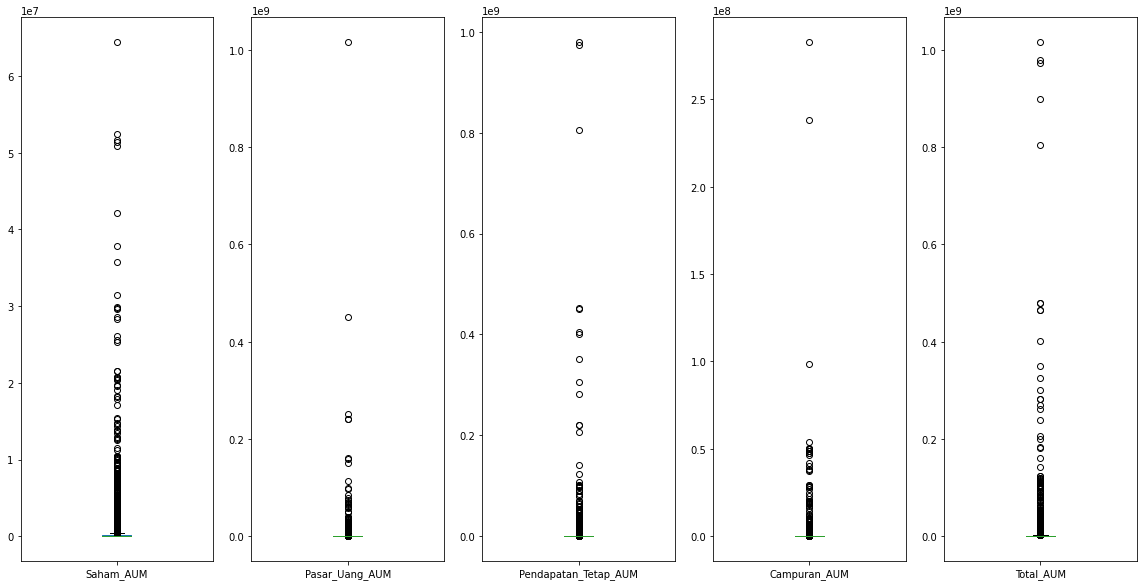

In [ ]:
# Initial screening of outliers using boxplot
ls_num2 = ['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM','Total_AUM']

# Adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,10))

# for 0 (i) , trans (el)
for i, el in enumerate (ls_num2):
    a = df_monthly.boxplot(el, ax=axes.flatten()[i],grid=False)

# Show Chart
plt.show()

It turns out that there are many outliers in the AUM (also balance) data. Use the IQR formula to calculate the upper and lower fence.

In [ ]:
# Filter without 0 value
filter_saham = df_monthly.loc[df_monthly['Saham_AUM'] !=0]
filter_pu = df_monthly.loc[df_monthly['Pasar_Uang_AUM'] !=0]
filter_pt = df_monthly.loc[df_monthly['Pendapatan_Tetap_AUM'] !=0]
filter_camp = df_monthly.loc[df_monthly['Campuran_AUM'] !=0]
filter_total = df_monthly.loc[df_monthly['Total_AUM'] !=0]

# Find Q1, Q3, IQR
Q1_saham = filter_saham['Saham_AUM'].quantile(0.25)
Q3_saham = filter_saham['Saham_AUM'].quantile(0.75)
IQR_saham = Q3_saham - Q1_saham

Q1_pu = filter_pu['Pasar_Uang_AUM'].quantile(0.25)
Q3_pu = filter_pu['Pasar_Uang_AUM'].quantile(0.75)
IQR_pu = Q3_pu - Q1_pu

Q1_pt = filter_pt['Pendapatan_Tetap_AUM'].quantile(0.25)
Q3_pt = filter_pt['Pendapatan_Tetap_AUM'].quantile(0.75)
IQR_pt = Q3_pt - Q1_pt

Q1_campuran = filter_camp['Campuran_AUM'].quantile(0.25)
Q3_campuran = filter_camp['Campuran_AUM'].quantile(0.75)
IQR_campuran = Q3_campuran - Q1_campuran

Q1_total = filter_total['Total_AUM'].quantile(0.25)
Q3_total = filter_total['Total_AUM'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Find Lower Fence and Upper Fence
lower_saham = Q1_saham - 1.5 * IQR_saham
upper_saham = Q3_saham + 1.5 * IQR_saham

lower_pu = Q1_pu - 1.5 * IQR_pu
upper_pu = Q3_pu + 1.5 * IQR_pu

lower_pt = Q1_pt - 1.5 * IQR_pt
upper_pt = Q3_pt + 1.5 * IQR_pt

lower_campuran = Q1_campuran - 1.5 * IQR_campuran
upper_campuran = Q3_campuran + 1.5 * IQR_campuran

lower_total = Q1_total - 1.5 * IQR_total
upper_total = Q3_total + 1.5 * IQR_total

#Show the calculation
ls_stat = ['Q1', 'Q3', 'IQR', 'lower_fence', 'upper_fence']
ls_saham = [Q1_saham, Q3_saham, IQR_saham, lower_saham, upper_saham]
ls_pasar_uang = [Q1_pu, Q3_pu, IQR_pu, lower_pu, upper_pu]
ls_pend_tetap = [Q1_pt, Q3_pt, IQR_pt, lower_pt, upper_pt]
ls_campuran = [Q1_campuran, Q3_campuran, IQR_campuran, lower_campuran, upper_campuran]
ls_total = [Q1_total, Q3_total, IQR_total, lower_total, upper_total]

# make dataframe
pd.DataFrame({'descriptive' : ls_stat,
              'stocks' : ls_saham,
              'money_market' : ls_pasar_uang,
              'bond' : ls_pend_tetap,
              'mixed' : ls_campuran,
              'total' : ls_total})

,descriptive,stocks,money_market,bond,mixed,total
0,Q1,50830.50,10028.00,49818.00,969549.00,100462.00
1,Q3,300741.50,200478.25,382762.50,5439621.50,866912.25
2,IQR,249911.00,190450.25,332944.50,4470072.50,766450.25
3,lower_fence,-324036.00,-275647.38,-449598.75,-5735559.75,-1049213.38
4,upper_fence,675608.00,486153.62,882179.25,12144730.25,2016587.62


In [ ]:
# Check Max values 
df_monthly.nlargest(10, 'Total_AUM')

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
111079,3902455,2021-09-30,0.00,0.00,0.00,1016171140.00,1012200000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1016171140.00,0.00
50226,3764129,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,979766956.00,970000000.00,0.00,0.00,0.00,0.00,979766956.00,0.00
50204,3764129,2021-08-31,0.00,0.00,0.00,0.00,0.00,0.00,973585139.00,970000000.00,0.00,0.00,0.00,0.00,973585139.00,0.00
151935,4056373,2021-09-30,0.00,0.00,0.00,450423947.00,450000000.00,0.00,449525162.00,450000000.00,0.00,0.00,0.00,0.00,899949109.00,0.00
28840,3726685,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,804734593.00,800000751.00,0.00,0.00,0.00,0.00,804734593.00,0.00
38015,3744696,2021-09-30,8297348.00,8000000.00,0.00,241536070.00,240075955.00,0.00,221139206.00,220000000.00,0.00,9496763.00,10000000.00,0.00,480469387.00,0.00
37993,3744696,2021-08-31,8005968.00,8000000.00,0.00,240665288.00,240075955.00,0.00,221371800.00,220000000.00,0.00,9748286.00,10000000.00,0.00,479791342.00,0.00
26286,3662093,2021-09-30,0.00,0.00,0.00,40148682.00,40000000.00,0.00,405274246.00,402950000.00,1900000.00,19907311.00,20000000.00,0.00,465330239.00,1900000.00
134970,3976699,2021-09-30,5182274.00,5000000.00,0.00,0.00,0.00,0.00,451481916.00,450000000.00,0.00,7931620.00,8000000.00,0.00,464595810.00,0.00
147062,4025068,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,400788079.00,400000000.00,0.00,0.00,0.00,0.00,400788079.00,0.00


We will drop data with

- total AUM > 500 million

because the gap amount is too far to the others

In [ ]:
# Show data without outlier
df_monthly_clean = df_monthly[(df_monthly['Total_AUM'] < 500000000)]
df_monthly_clean.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Total_AUM,Total_transaction
1,50701,2021-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10206945.00,10000000.00,0.00,10206945.00,0.00
23,50701,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9943587.00,10000000.00,0.00,9943587.00,0.00
24,50961,2021-08-31,716057.00,700000.00,0.00,100049.00,100000.00,0.00,200117.00,200000.00,0.00,0.00,0.00,0.00,1016223.00,0.00
46,50961,2021-09-30,2063909.00,2000000.00,300000.00,700603.00,700000.00,600000.00,1398998.00,1400000.00,1200000.00,0.00,0.00,0.00,4163510.00,2100000.00
52,53759,2021-08-31,70839.00,70000.00,0.00,10006.00,10000.00,0.00,20066.00,20000.00,0.00,0.00,0.00,0.00,100911.00,0.00


In [ ]:
# Filter value that < Bottom fence and > Upper fence
filter_min = df_monthly['Total_AUM'] < boxplot_min
filter_max = df_monthly['Total_AUM'] > boxplot_max

# Show data without outlier
df_monthly_clean = df_monthly.loc[(filter_min | filter_max)]
df_monthly_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8884 entries, 1 to 158810
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              8884 non-null   object        
 1   date                                 8884 non-null   datetime64[ns]
 2   Saham_AUM                            8884 non-null   float64       
 3   Saham_invested_amount                8884 non-null   float64       
 4   Saham_transaction_amount             8884 non-null   float64       
 5   Pasar_Uang_AUM                       8884 non-null   float64       
 6   Pasar_Uang_invested_amount           8884 non-null   float64       
 7   Pasar_Uang_transaction_amount        8884 non-null   float64       
 8   Pendapatan_Tetap_AUM                 8884 non-null   float64       
 9   Pendapatan_Tetap_invested_amount     8884 non-null   float64       
 10  Pendapatan

# B. Data Transformation

### End of Period AUM, Balance, and Profit

In [ ]:
df_trans1 = df_monthly_clean.copy()

In [ ]:
# Filter date for end-of-period AUM and Invested Amount
df_trans1 = df_monthly_clean.loc[(df_monthly_clean['date'] == '2021-09-30') | (df_monthly_clean['date'] == '2021-08-31')].reset_index()

# Change date format to yyyy-mm
df_trans1['month'] = df_trans1['date'].dt.strftime('%Y-%m')

# Make new columns for Profit per mutual funds
df_trans1['Stocks_profit'] = df_trans1['Saham_AUM'] - df_trans1['Saham_invested_amount']
df_trans1['MoneyMarket_profit'] = df_trans1['Pasar_Uang_AUM'] - df_trans1['Pasar_Uang_invested_amount']
df_trans1['Bond_profit'] = df_trans1['Pendapatan_Tetap_AUM'] - df_trans1['Pendapatan_Tetap_invested_amount']
df_trans1['Mixed_profit'] = df_trans1['Campuran_AUM'] - df_trans1['Campuran_invested_amount']

# Rename Columns
df_trans1 = df_trans1.rename(
    columns = {'Saham_AUM':'Stocks_AUM','Pasar_Uang_AUM':'MoneyMarket_AUM','Pendapatan_Tetap_AUM':'Bond_AUM','Campuran_AUM':'Mixed_AUM',
               'Saham_invested_amount':'Stocks_balance','Pasar_Uang_invested_amount':'MoneyMarket_balance',
               'Pendapatan_Tetap_invested_amount':'Bond_balance','Campuran_invested_amount':'Mixed_balance'})

# Arrange the order of the column
df_trans1 = df_trans1[['user_id', 'month', 'Stocks_AUM', 'Stocks_balance', 'Stocks_profit', 'MoneyMarket_AUM',
       'MoneyMarket_balance', 'MoneyMarket_profit', 'Bond_AUM', 'Bond_balance',
       'Bond_profit', 'Mixed_AUM', 'Mixed_balance', 'Mixed_profit']]

df_trans1

,user_id,month,Stocks_AUM,Stocks_balance,Stocks_profit,MoneyMarket_AUM,MoneyMarket_balance,MoneyMarket_profit,Bond_AUM,Bond_balance,Bond_profit,Mixed_AUM,Mixed_balance,Mixed_profit
0,50701,2021-08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10206945.00,10000000.00,206945.00
1,50701,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9943587.00,10000000.00,-56413.00
2,50961,2021-08,716057.00,700000.00,16057.00,100049.00,100000.00,49.00,200117.00,200000.00,117.00,0.00,0.00,0.00
3,50961,2021-09,2063909.00,2000000.00,63909.00,700603.00,700000.00,603.00,1398998.00,1400000.00,-1002.00,0.00,0.00,0.00
4,53759,2021-08,70839.00,70000.00,839.00,10006.00,10000.00,6.00,20066.00,20000.00,66.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,4164993,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,175081.00,175000.00,81.00,0.00,0.00,0.00
8880,4165132,2021-09,0.00,0.00,0.00,10001.00,10000.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8881,4165630,2021-09,41625.00,40000.00,1625.00,10001.00,10000.00,1.00,49869.00,50000.00,-131.00,0.00,0.00,0.00
8882,4165704,2021-09,0.00,0.00,0.00,0.00,0.00,0.00,9987.00,10000.00,-13.00,0.00,0.00,0.00


## Total Buy, Total Sell, Net, and Frequency

We want to get information about buy, sell, net, and frequency transaction. So we will use daily transaction data only.

In [ ]:
# Rename Columns
df_trans2 = df_daily_clean.copy()
df_trans2 = df_trans2.rename(
    columns = {'Saham_transaction_amount':'Stocks_transaction','Pasar_Uang_transaction_amount':'MoneyMarket_transaction',
               'Pendapatan_Tetap_transaction_amount':'Bond_transaction','Campuran_transaction_amount':'Mixed_transaction'})

# Show data after add new columns
df_trans2 = df_trans2[['user_id','date','Stocks_transaction','MoneyMarket_transaction','Bond_transaction','Mixed_transaction']]
df_trans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128223 entries, 0 to 158810
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  128223 non-null  object        
 1   date                     128223 non-null  datetime64[ns]
 2   Stocks_transaction       128223 non-null  float64       
 3   MoneyMarket_transaction  128223 non-null  float64       
 4   Bond_transaction         128223 non-null  float64       
 5   Mixed_transaction        128223 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 6.8+ MB


We need the month column which will be used to create monthly aggregation of total buy, total sell, and net.

In [ ]:
# Change date format to yyyy-mm
df_trans3 = df_trans2.copy()
df_trans3['month'] = df_trans3['date'].dt.strftime('%Y-%m')
df_trans3

,user_id,date,Stocks_transaction,MoneyMarket_transaction,Bond_transaction,Mixed_transaction,month
0,50701,2021-08-30,0.00,0.00,0.00,0.00,2021-08
1,50701,2021-08-31,0.00,0.00,0.00,0.00,2021-08
2,50701,2021-09-01,0.00,0.00,0.00,0.00,2021-09
3,50701,2021-09-02,0.00,0.00,0.00,0.00,2021-09
4,50701,2021-09-03,0.00,0.00,0.00,0.00,2021-09
...,...,...,...,...,...,...,...
158805,4164993,2021-09-30,0.00,0.00,0.00,0.00,2021-09
158807,4165132,2021-09-30,0.00,0.00,0.00,0.00,2021-09
158808,4165630,2021-09-30,0.00,0.00,0.00,0.00,2021-09
158809,4165704,2021-09-30,0.00,0.00,0.00,0.00,2021-09


In [ ]:
df_agg_bal = df_trans3.assign(
    total_buy_stocks = np.where(
        df_trans3['Stocks_transaction'] > 0,
        df_trans3['Stocks_transaction'],
        0,
    ),
    total_sell_stocks = np.where(
        df_trans3['Stocks_transaction'] < 0,
        df_trans3['Stocks_transaction'],
        0,
    ),
    transaction_frequency_stocks  = np.where(
        (df_trans3['Stocks_transaction'] > 0) | (df_trans3['Stocks_transaction'] < 0),
        1,
        0,
    ),
    total_buy_moneymarket = np.where(
        df_trans3['MoneyMarket_transaction'] > 0,
        df_trans3['MoneyMarket_transaction'],
        0,
    ),
    total_sell_moneymarket = np.where(
        df_trans3['MoneyMarket_transaction'] < 0,
        df_trans3['MoneyMarket_transaction'],
        0,
    ),
    transaction_frequency_moneymarket = np.where(
        (df_trans3['MoneyMarket_transaction'] > 0) | (df_trans3['MoneyMarket_transaction'] < 0),
        1,
        0,
    ),
    total_buy_bond = np.where(
        df_trans3['Bond_transaction'] > 0,
        df_trans3['Bond_transaction'],
        0,
    ),
    total_sell_bond = np.where(
        df_trans3['Bond_transaction'] < 0,
        df_trans3['Bond_transaction'],
        0,
    ),
    transaction_frequency_bond = np.where(
        (df_trans3['Bond_transaction'] > 0) | (df_trans3['Bond_transaction'] < 0),
        1,
        0,
    ),
    total_buy_mixed = np.where(
        df_trans3['Mixed_transaction'] > 0,
        df_trans3['Mixed_transaction'],
        0,
    ),
    total_sell_mixed = np.where(
        df_trans3['Mixed_transaction'] < 0,
        df_trans3['Mixed_transaction'],
        0,
    ),
    transaction_frequency_mixed = np.where(
        (df_trans3['Mixed_transaction'] > 0) | (df_trans3['Mixed_transaction'] < 0),
        1,
        0,
    ),
)

df_agg_bal = (df_agg_bal.groupby(['user_id','month']).agg({
    'total_buy_stocks':'sum',  'total_sell_stocks':'sum', 'transaction_frequency_stocks':'sum',
    'total_buy_moneymarket':'sum', 'total_sell_moneymarket':'sum', 'transaction_frequency_moneymarket':'sum',
    'total_buy_bond':'sum', 'total_sell_bond':'sum', 'transaction_frequency_bond':'sum',
    'total_buy_mixed':'sum', 'total_sell_mixed':'sum', 'transaction_frequency_mixed':'sum'
}).reset_index())

df_agg_bal = df_agg_bal.assign(
    total_net_stocks = df_agg_bal['total_buy_stocks'] + df_agg_bal['total_sell_stocks'],
    total_net_moneymarket = df_agg_bal['total_buy_moneymarket'] + df_agg_bal['total_sell_moneymarket'],
    total_net_bond = df_agg_bal['total_buy_bond'] + df_agg_bal['total_sell_bond'],
    total_net_mixed = df_agg_bal['total_buy_mixed'] + df_agg_bal['total_sell_mixed']
)

df_agg_bal

,user_id,month,total_buy_stocks,total_sell_stocks,transaction_frequency_stocks,total_buy_moneymarket,total_sell_moneymarket,transaction_frequency_moneymarket,total_buy_bond,total_sell_bond,transaction_frequency_bond,total_buy_mixed,total_sell_mixed,transaction_frequency_mixed,total_net_stocks,total_net_moneymarket,total_net_bond,total_net_mixed
0,1004326,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
1,1004326,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
2,1005053,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
3,1005165,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
4,1018814,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,990466,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
10346,990466,2021-09,770000.00,0.00,2,150000.00,0.00,2,580000.00,0.00,2,0.00,0.00,0,770000.00,150000.00,580000.00,0.00
10347,99245,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
10348,997938,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00


In [ ]:
df_agg_bal = df_trans3.assign(
    total_buy_stocks = np.where(df_trans3['Stocks_transaction'] > 0,df_trans3['Stocks_transaction'], 0,),
    total_sell_stocks = np.where(df_trans3['Stocks_transaction'] < 0, df_trans3['Stocks_transaction'], 0,),
    stocks_freq = np.where( (df_trans3['Stocks_transaction'] > 0) | (df_trans3['Stocks_transaction'] < 0) , 1, 0),
    stocks_buyfreq = np.where( (df_trans3['Stocks_transaction'] > 0), 1, 0),
    stocks_sellfreq = np.where( (df_trans3['Stocks_transaction'] < 0) , 1, 0),

    total_buy_moneymarket = np.where(df_trans3['MoneyMarket_transaction'] > 0, df_trans3['MoneyMarket_transaction'], 0,),
    total_sell_moneymarket = np.where(df_trans3['MoneyMarket_transaction'] < 0, df_trans3['MoneyMarket_transaction'], 0,),
    moneymarket_freq = np.where( (df_trans3['MoneyMarket_transaction'] > 0) | (df_trans3['MoneyMarket_transaction'] < 0) , 1, 0),
    moneymarket_buyfreq = np.where( (df_trans3['MoneyMarket_transaction'] > 0), 1, 0),
    moneymarket_sellfreq = np.where( (df_trans3['MoneyMarket_transaction'] < 0) , 1, 0),

    total_buy_bond = np.where(df_trans3['Bond_transaction'] > 0, df_trans3['Bond_transaction'], 0,),
    total_sell_bond = np.where(df_trans3['Bond_transaction'] < 0, df_trans3['Bond_transaction'], 0,),
    bond_freq = np.where( (df_trans3['Bond_transaction'] > 0) | (df_trans3['Bond_transaction'] < 0) , 1, 0),
    bond_buyfreq = np.where( (df_trans3['Bond_transaction'] > 0), 1, 0),
    bond_sellfreq = np.where( (df_trans3['Bond_transaction'] < 0) , 1, 0),

    total_buy_mixed = np.where(df_trans3['Mixed_transaction'] > 0, df_trans3['Mixed_transaction'], 0,),
    total_sell_mixed = np.where(df_trans3['Mixed_transaction'] < 0, df_trans3['Mixed_transaction'], 0,),
    mixed_freq = np.where( (df_trans3['Mixed_transaction'] > 0) | (df_trans3['Mixed_transaction'] < 0) , 1, 0),
    mixed_buyfreq = np.where( (df_trans3['Mixed_transaction'] > 0), 1, 0),
    mixed_sellfreq = np.where( (df_trans3['Mixed_transaction'] < 0) , 1, 0),
)

df_agg_bal = (df_agg_bal.groupby(['user_id','month']).agg({
    'total_buy_stocks':'sum',  'total_sell_stocks':'sum', 'stocks_freq':'sum',
    'total_buy_moneymarket':'sum', 'total_sell_moneymarket':'sum', 'moneymarket_freq':'sum',
    'total_buy_bond':'sum', 'total_sell_bond':'sum', 'bond_freq':'sum',
    'total_buy_mixed':'sum', 'total_sell_mixed':'sum', 'mixed_freq':'sum'
}).reset_index())

df_agg_bal = df_agg_bal.assign(
    total_net_stocks = df_agg_bal['total_buy_stocks'] + df_agg_bal['total_sell_stocks'],
    total_net_moneymarket = df_agg_bal['total_buy_moneymarket'] + df_agg_bal['total_sell_moneymarket'],
    total_net_bond = df_agg_bal['total_buy_bond'] + df_agg_bal['total_sell_bond'],
    total_net_mixed = df_agg_bal['total_buy_mixed'] + df_agg_bal['total_sell_mixed']
)

df_agg_bal

,user_id,month,total_buy_stocks,total_sell_stocks,stocks_freq,total_buy_moneymarket,total_sell_moneymarket,moneymarket_freq,total_buy_bond,total_sell_bond,bond_freq,total_buy_mixed,total_sell_mixed,mixed_freq,total_net_stocks,total_net_moneymarket,total_net_bond,total_net_mixed
0,1004326,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
1,1004326,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
2,1005053,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
3,1005165,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
4,1018814,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10345,990466,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
10346,990466,2021-09,770000.00,0.00,2,150000.00,0.00,2,580000.00,0.00,2,0.00,0.00,0,770000.00,150000.00,580000.00,0.00
10347,99245,2021-09,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00
10348,997938,2021-08,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,0.00,0.00


Saham_freq = np.where( (dailytotal['Saham_transaction_amount'] > 0) | (dailytotal['Saham_transaction_amount'] < 0) , 1, 0),
      Saham_buyfreq = np.where( (dailytotal['Saham_transaction_amount'] > 0), 1, 0),
      Saham_sellfreq = np.where( (dailytotal['Saham_transaction_amount'] < 0) , 1, 0),

# C. Merge Data

### Daily Transaction

In [ ]:
df_user_clean.columns

Index(['user_id', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used'],
      dtype='object')

In [ ]:
# Merge daily transaction and user data
df_daily_trans = df_user_clean.merge(df_trans2, how = 'inner', on='user_id')
df_daily_trans

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Stocks_transaction,MoneyMarket_transaction,Bond_transaction,Mixed_transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,2021-08-17,0.00,0.00,0.00,0.00
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,2021-08-18,0.00,0.00,0.00,0.00
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,2021-08-19,0.00,0.00,0.00,0.00
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,2021-08-20,0.00,0.00,0.00,0.00
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,not used referral,2021-08-23,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
128155,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,2021-09-24,0.00,0.00,0.00,0.00
128156,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,2021-09-27,0.00,0.00,0.00,0.00
128157,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,2021-09-28,0.00,0.00,0.00,0.00
128158,3881981,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,not used referral,2021-09-29,10000000.00,0.00,0.00,0.00


### Monthly Transaction

In [ ]:
df_merge2.columns

Index(['user_id', 'user_gender', 'user_age', 'user_occupation',
       'user_income_range', 'referral_code_used', 'month', 'Stocks_AUM',
       'Stocks_balance', 'Stocks_profit', 'MoneyMarket_AUM',
       'MoneyMarket_balance', 'MoneyMarket_profit', 'Bond_AUM', 'Bond_balance',
       'Bond_profit', 'Mixed_AUM', 'Mixed_balance', 'Mixed_profit',
       'total_buy_stocks', 'total_sell_stocks', 'stocks_freq',
       'total_buy_moneymarket', 'total_sell_moneymarket', 'moneymarket_freq',
       'total_buy_bond', 'total_sell_bond', 'bond_freq', 'total_buy_mixed',
       'total_sell_mixed', 'mixed_freq', 'total_net_stocks',
       'total_net_moneymarket', 'total_net_bond', 'total_net_mixed'],
      dtype='object')

In [ ]:
# Merge monthly aggregation, AUM-Balance, and user data
df_merge1 = df_trans1.merge(df_agg_bal, how='inner', on=['user_id','month'])
df_merge2 = df_user_clean.merge(df_merge1, how='inner', on='user_id')

# Arrange the order of the column for easy reading
df_monthly_trans = df_merge2[['user_id', 'user_gender', 'user_age', 'user_occupation', 'user_income_range', 'referral_code_used', 'month',
      'Stocks_AUM', 'Stocks_balance', 'Stocks_profit', 'total_buy_stocks', 'total_sell_stocks', 'total_net_stocks', 'MoneyMarket_AUM', 'MoneyMarket_balance', 'MoneyMarket_profit', 'total_buy_moneymarket', 'total_sell_moneymarket', 'total_net_moneymarket', 'transaction_frequency_moneymarket', 
      'Bond_AUM', 'Bond_balance', 'Bond_profit', 'total_buy_bond', 'total_sell_bond',  'total_net_bond','Mixed_AUM', 'Mixed_balance', 'Mixed_profit', 'total_buy_mixed', 'total_sell_mixed', 'total_net_mixed', 'transaction_frequency_mixed']]

df_monthly_trans

KeyError: ignored

# D. EDA

## Data Insight

### User Demographics

In [ ]:
# Descriptive Statistic on Categorical Data
ls_cat = ['user_gender','user_occupation','user_income_range','referral_code_used']
df_daily_trans[ls_cat].describe()

*Data Overview :*

* From the distribution of users, it was found that the number of male investors is **higher**.
* The age distribution of users is **relatively young**, with a elimination of **below 10 million IDR**.
* Users are aware of the application from their own observations, as seen from the number of **unused referral facilities**.

In [ ]:
# Descriptive Statistic on Numerical Data
df_daily_trans[['user_age']].describe()

Data Overview :
- The youngest user is 17 years old.
- Users are mostly between the ages of 21 and 30.

> How many users do we have in the data?

In [ ]:
df_u1 = df_daily_trans.copy()

In [ ]:
df_daily_trans.info()

In [ ]:
df_unique_user = df_daily_trans.drop_duplicates(subset=['user_id'])
df_unique_user['user_id'].nunique() 

We have a total of **7757** users.

> What is the ratio of male and female users?

In [ ]:
df_gender = df_unique_user['user_gender'].value_counts().rename_axis('gender').reset_index(name='counts')
df_gender

In [ ]:
# This is just a cosmetic
mydata = df_gender['counts']
mylabels = df_gender['gender']
mycolors = [ '#99ccff', '#ffb3e6']

# Show pie plot of %user
plt.figure(figsize=(10,10))
plt.pie(mydata, autopct='%.2f%%', labels = mylabels, colors = mycolors)
plt.title('Percentage of User Gender', fontsize=18)
plt.show()

Most of users are male with a total of **61%** of total users.

How is the user age distribution?

In [ ]:
df_unique_user['user_age'].value_counts()

In [ ]:
df_unique_user['user_age'].hist(figsize=(10,5))
plt.xlabel('age', fontsize=12)
plt.title('Distribution of User Age', fontsize=15)

The majority of our users are **20-25** years old.

What occupation do most of our users have?

In [ ]:
df_occupation = df_unique_user['user_occupation'].value_counts().rename_axis('occupation').reset_index(name='counts')
df_occupation

In [ ]:
# Bar chart via plt
plt.figure(figsize=(15,7))
plt.title('Count of User Occupation', fontsize=18)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Occupation', fontsize=13)

total_data = df_unique_user['user_id'].count()

df_occupation.sort_values('counts', ascending=True, inplace=True)
x = df_occupation['occupation']
y = df_occupation['counts']

for i, v in enumerate(y):
    plt.text(v+5, i, str(round(v/total_data*100,2)) + '%', fontsize=12)

plt.barh(x, y, color='#82CEA1')
plt.show()

Most of our users are **54% students**, followed by **23% private workers**.

What income range of users?

In [ ]:
df_income = df_unique_user['user_income_range'].value_counts().rename_axis('income_range').reset_index(name='counts')
df_income

In [ ]:
# Bar chart via plt
plt.figure(figsize=(15,7))
plt.title('Count of User Income Range', fontsize=18)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Income Range', fontsize=13)

total_data = df_unique_user['user_id'].count()

df_income.sort_values('counts', ascending=True, inplace=True)
x = df_income['income_range']
y = df_income['counts']

for i, v in enumerate(y):
    plt.text(v+5, i, str(round(v/total_data*100,2)) + '%', fontsize=12)

plt.barh(x, y, color='#A9C4C3')
plt.show()

More than 70% of our users have income < 50 million

Ratio of users using the referral code?

In [ ]:
df_referral = df_unique_user['referral_code_used'].value_counts().rename_axis('referral_code').reset_index(name='counts')
df_referral

In [ ]:
# This is just a cosmetic
mydata = df_referral['counts']
mylabels = df_referral['referral_code']
mycolors = ['skyblue', 'lightsalmon']

# Show pie plot of %referral
plt.figure(figsize=(10,10))
plt.pie(mydata, autopct='%.2f%%', labels = mylabels, colors = mycolors)
plt.title('Percentage of Users Using the Referral Code', fontsize=20)
plt.show()

There are **67%** of total users registered to the app without referral code

### User AUM and Profit

In [ ]:
# Statistical Description
pd.set_option('display.float_format', lambda x:'%.2f' %x)
pd.reset_option('max_columns', None)
df_describe = df_monthly_trans.replace(0,np.nan).describe()
df_describe

In [ ]:
df_describe = df_describe.T.reset_index()
df_describe

In [ ]:
df_describe.columns

What is the average AUM per user?

In [ ]:
df_AUM = df_describe[df_describe['index'].str.contains('AUM', na=False)]
df_AUM = df_AUM[['index','mean']]
df_AUM

In [ ]:
# Bar chart via plt
plt.figure(figsize=(15,7))
plt.title('Average AUM per User', fontsize=18)
plt.xlabel('Average', fontsize=13)
plt.ylabel('Mutual Fund Type', fontsize=13)

df_AUM.sort_values('mean', ascending=True, inplace=True)
x = df_AUM['index']
y = df_AUM['mean']

for i, v in enumerate (y):
  plt.text(v+5, i, str(round(v/1000,2)) + 'k', fontsize=12)

plt.barh(x, y, color='#BEC903')
plt.show()

Average current profit per user?

In [ ]:
df_profit = df_describe[df_describe['index'].str.contains('profit', na=False)]
df_profit = df_profit[['index','mean']]
df_profit

In [ ]:
# Bar chart via plt
plt.figure(figsize=(15,7))
plt.title('Average Profit per User', fontsize=18)
plt.xlabel('Average', fontsize=13)
plt.ylabel('Mutual Fund Type', fontsize=13)

df_profit.sort_values('mean', ascending=True, inplace=True)
x = df_profit['index']
y = df_profit['mean']

for i, v in enumerate (y) :
  plt.text(v+5, i, str(round(v/1000,2))+'k', fontsize=12)

colors = []
for value in df_profit['mean'] :
  if value < 0 :
    colors.append('lightcoral')
  else :
    colors.append('yellowgreen')

plt.barh(x, y, color=colors)
plt.show()

### User Transaction

In [ ]:
df_monthly_avg = df_monthly_trans.replace(0,np.nan).groupby('month').mean()
df_monthly_avg

In [ ]:
df_monthly_avg = df_monthly_avg.T.reset_index()
df_monthly_avg

**What is the average monthly buy per user?**

In [ ]:
df_buy = df_monthly_avg[df_monthly_avg['index'].str.contains('buy', na=False)]
df_buy

In [ ]:
# Bar chart via df.plot
df_buy.plot.bar(
    x='index',
    y=['2021-08','2021-09'], 
    figsize=(15,7),
    # title='Average Monthly Buy per User',
    color = {'2021-08':'salmon','2021-09':'steelblue'},
    rot=0
    )

plt.title('Average Monthly Buy per User', fontsize=18)
plt.xlabel('Mutual Fund Type', fontsize=13)
plt.ylabel('Average', fontsize=13)

In September the average buy of mixed mutual funds has decreased from the previous month. Whereas for other types of mutual funds, it looks stagnant.

In [ ]:
df_sell = df_monthly_avg[df_monthly_avg['index'].str.contains('sell', na=False)]

df_sell[['2021-08','2021-09']] = df_sell[['2021-08','2021-09']].abs() # make absolute data without minus
df_sell

In [ ]:
# Bar chart via df.plot
df_sell.plot.bar(
    x='index',
    y=['2021-08','2021-09'], 
    figsize=(15,7),
    # title='Average Monthly Sell per User',
    color = {'2021-08':'salmon','2021-09':'steelblue'},
    rot=0
    )

plt.title('Average Monthly Sell per User', fontsize=18)
plt.xlabel('Mutual Fund Type', fontsize=13)
plt.ylabel('Average', fontsize=13)

Just like buy transactions, it can be seen that in September the average sell of mixed mutual funds has decreased from the previous month. Whereas for other types of mutual funds, it looks stagnant.

monthly frequency buy/sell per user

In [ ]:
df_freq = df_monthly_avg[df_monthly_avg['index'].str.contains('frequency', na=False)]
df_freq

In [ ]:
# Bar chart via df.plot
df_freq.plot.bar(
    x='index',
    y=['2021-08','2021-09'], 
    figsize=(15,7),
    color = {'2021-08':'salmon','2021-09':'steelblue'},
    rot=0
    )

plt.title('Average Frequency Transaction per User', fontsize=18)
plt.xlabel('Mutual Fund Type', fontsize=13)
plt.ylabel('Average', fontsize=13)

The frequency of transactions (buy/sell) in September **increased** compared to the previous month. User makes transaction on average **1-2 times per month**.

## Key Trends

### Is there any consistent *low season* and *high season*?

In [ ]:
# Create a time series of data containing count of daily transactions
df_count_trans = df_daily_trans.replace(0, np.nan).groupby('date').count()
df_count_trans

In [ ]:
# Transform column names into values to make it easier to create lineplots
dfn = df_count_trans.reset_index()
dfn = dfn[['date','Stocks_transaction','MoneyMarket_transaction','Bond_transaction','Mixed_transaction']]
dfn = dfn.melt('date', var_name='type', value_name='vals')
dfn

In [ ]:
# Line Plot via sns
plt.figure(figsize=(20,5))
plt.title('Daily Transaction Count', fontsize=18)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Transaction Count', fontsize=13)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.lineplot(data=dfn, x='date', y='vals', hue='type')
plt.show()

2021-08-22 - 2021-09-22

In [ ]:
# Filter on Mixed data
dfn_mixed = dfn[dfn['type'].str.contains('Mixed', na=False)]

# Line Plot via sns
plt.figure(figsize=(20,5))
plt.title('Daily Transaction Count of Mixed Mutual Funds', fontsize=18)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Transaction Count', fontsize=13)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.lineplot(data=dfn_mixed, x='date', y='vals')
plt.show()

There is *no particular pattern* in the transactions of mixed mutual funds

In [ ]:
# day-to-day
dfn['day_name'] = dfn['date'].dt.day_name()
dfn['day_num'] = dfn['date'].dt.dayofweek
dfn_day = dfn.groupby(['day_num','day_name','type']).sum()[['vals']].reset_index()
dfn_day

In [ ]:
# Line Plot via sns
fig = plt.figure(figsize=(20,5))
fig.suptitle('Week-Wise Transaction Count', fontsize=18)
plt.xlabel('Day Name', fontsize=13)
plt.ylabel('Transaction Count', fontsize=13)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
sns.lineplot(data=dfn_day, x='day_name', y='vals', hue='type')
plt.show()

Our users tend to make transactions (buy/sell) at the middle of each week (Wednesday)

### How about trends over time? Is it **increasing** or **decreasing**?

In [ ]:
df_trend = df_count_trans.reset_index()
df_trend.head()

#### Stocks Transaction Trendline

In [ ]:
fig = px.scatter(
    df_trend,
    x='date',
    y='Stocks_transaction',
    color_discrete_sequence=['black'],
    trendline='ols',
    labels={
        'date':'Date',
        'Stocks_transaction':'Transaction Count'
    },
    title='Daily Count of Stocks Transaction Trendline'
)
fig.show()

**R² of 77%**


#### Money Market Transaction Trendline

In [ ]:
fig = px.scatter(
    df_trend,
    x='date',
    y='MoneyMarket_transaction',
    color_discrete_sequence=['black'],
    trendline='ols',
    labels={
        'date':'Date',
        'MoneyMarket_transaction':'Transaction Count'
    },
    title='Daily Count of Money Market Transaction Trendline'
)
fig.show()

**R² of 72%**

#### Bond Transaction Trendline

In [ ]:
fig = px.scatter(
    df_trend,
    x='date',
    y='Bond_transaction',
    color_discrete_sequence=['black'],
    trendline='ols',
    labels={
        'date':'Date',
        'MBond_transaction':'Transaction Count'
    },
    title='Daily Count of Bond Transaction Trendline'
)
fig.show()

**R² of 77%**

#### Mixed Transaction Trendline

In [ ]:
fig = px.scatter(
    df_trend,
    x='date',
    y='Mixed_transaction',
    color_discrete_sequence=['black'],
    trendline='ols',
    labels={
        'date':'Date',
        'Mixed_transaction':'Transaction Count'
    },
    title='Daily Count of Mixed Transaction Trendline'
)
fig.show()

**R² is very small (41%)**. We can’t conclude that the trend is really increasing.

# MILESTONE 2

# E. CLUSTER ANALYSIS

K-Means Approach 

## Preparation

In [ ]:
from sklearn.cluster import KMeans                                             
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     
from sklearn import cluster                                                    
from yellowbrick.cluster import SilhouetteVisualizer

import matplotlib.cm as cm                                                     
from sklearn.metrics import silhouette_samples, silhouette_score              
from sklearn.datasets import make_blobs                                       

In [ ]:
df_cluster = df_monthly_trans.copy()
df_cluster.head()
df_cluster.columns

Filter data that will be used in the cluster analysis

In [ ]:
# Filter month on September
df_cluster = df_cluster.loc[df_cluster['month'] == '2021-09'].reset_index()

# calculate total transaction
df_cluster['total_transaction'] = df_cluster['total_net_stocks'] + df_cluster['total_net_moneymarket'] + df_cluster['total_net_bond'] + df_cluster['total_net_mixed']
df_cluster['total_balance'] = df_cluster['Stocks_balance'] + df_cluster['MoneyMarket_balance'] + df_cluster['Bond_balance'] + df_cluster['Mixed_balance']

Membuat tipe kategori berdasarkan Risk Manajemen:
- Conservative, Persentasi invest < 14%

- Moderate, Persentasi invest 15-49%

- Aggresive, Persentasi invest > 50%

In [ ]:
# Make equation for percentage stocks from total invested amount
df_cluster['%_stocks'] = df_cluster['Stocks_balance'] / df_cluster['total_balance'] * 100

# Make a new categorical column for risk profile
cat = []
for value in df_cluster['%_stocks'] :
  if value < 14 :
    cat.append('Conservative')
  elif value < 50 :
    cat.append('Moderate')
  else :
    cat.append('Aggresive')

df_cluster['investor_type'] = cat

In [ ]:
# Show used data only
df_cluster = df_cluster[['user_id','user_age','user_occupation','user_income_range','total_balance','investor_type']]
df_cluster.head()

In [ ]:
df_cluster.info() # See summary data overview

## Categorical Encoding

### User Generation

In [ ]:
# Make a range of user age
age = []
for value in df_cluster['user_age'] :
  if value <= 24 :
    age.append('Gen Z')
  elif value > 24 and value <= 40 :
    age.append('Millenials')
  elif value > 40 and value <= 56 :
    age.append('Gen X')
  else :
    age.append('Baby Boomers')

df_cluster['age_generation'] = age
df_cluster.head()

In [ ]:
# Copy the dataframe for safety reason
df_tocluster = df_cluster.copy()

# Transform age generation
df_tocluster['age_generation'] = df_tocluster['age_generation'].astype('category')
df_tocluster['age_generation'] = df_tocluster['age_generation'].cat.set_categories(['Gen Z', 'Millenials', 'Gen X','Baby Boomers'], ordered = True)
df_tocluster['age_generation'].cat.codes

df_tocluster['age_category'] = df_tocluster['age_generation'].cat.codes

df_tocluster[['age_generation','age_category']].drop_duplicates()

### **User Income Range**

In [ ]:
# Transform income range
df_tocluster['user_income_range'] = df_tocluster['user_income_range'].astype('category')
df_tocluster['user_income_range'] = df_tocluster['user_income_range'].cat.set_categories(['< 10 Juta', 'Rp 10 Juta - 50 Juta', '> Rp 50 Juta - 100 Juta', '> Rp 100 Juta - 500 Juta', '> Rp 500 Juta - 1 Miliar','> Rp 1 Miliar'], ordered = True)
df_tocluster['user_income_range'].cat.codes

df_tocluster['income_range_category'] = df_tocluster['user_income_range'].cat.codes

df_tocluster[['user_income_range','income_range_category']].drop_duplicates()

### Investor Type

In [ ]:
# Transform investor type
df_tocluster['investor_type'] = df_tocluster['investor_type'].astype('category')
df_tocluster['investor_type'] = df_tocluster['investor_type'].cat.set_categories(['Conservative','Moderate','Aggresive'], ordered = True)
df_tocluster['investor_type'].cat.codes

df_tocluster['investor_type_category'] = df_tocluster['investor_type'].cat.codes

df_tocluster[['investor_type','investor_type_category']].drop_duplicates()

### User Occupation

In [ ]:
# Transform occupation
dum_df = pd.get_dummies(df_tocluster, columns=['user_occupation'], prefix=["user_occupation"])
df_tocluster = df_tocluster.merge(dum_df)
df_tocluster.head()

In [ ]:
df_tocluster.info()

In [ ]:
# Drop the column that are not needed for next analysis
df_tocluster = df_tocluster.drop(['user_id','user_age','user_occupation','user_income_range','investor_type','age_generation'],axis=1)
df_tocluster.head()

## Scaling

In [ ]:
scaler = MinMaxScaler()
df_tocluster['total_balance'] = scaler.fit_transform(df_tocluster[['total_balance']])
df_tocluster.head()

## Determine Cluster Number

Create a cluster range that make sense for business which from 2 to 10

### Elbow Method

In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_tocluster)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette Method

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters, random_state = 42)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_tocluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

## Implement Clustering

In [ ]:
cluster_model = KMeans(n_clusters = 5, random_state = 42)
cluster_model.fit(df_tocluster)

cluster_label = cluster_model.labels_
df_cluster['cluster'] = cluster_label
df_cluster

In [ ]:
df_cluster.columns

In [ ]:
#Aggregation
df_cluster.groupby(['cluster','investor_type','user_income_range']).agg({'user_id':['nunique'], 'user_age':['median','mean','min','max'], 'total_balance':['median','mean','min','max']})

* Cluster 0: Conservative, Moderate; Income range **IDR 10-50 Million**
* Cluster 1: Conservative, Moderate; Income range **IDR 50-500 Million**
* Cluster 2: Aggressive; Income range **IDR < 10 Million**
* Cluster 3: Conservative, Moderate; Income range **IDR < 10 Million**
* Cluster 4: Aggressive, Moderate; Income range **IDR 50-100 Million**

## Cluster Interpretation

**Age**

In [ ]:
df_cluster.groupby(['cluster'])['user_age'].agg(['count','mean','median','max','min'])

* Cluster 0: average is at 34 years; with the youngest user at 17 years old and the oldest user at 66 years old
* Cluster 1: average is at 30 years; with the youngest user at 17 years old and the oldest user at 66 years old
* Cluster 2: average is at 24 years; with the youngest user at 17 years old and the oldest user at 56 years old
* Cluster 3: average is at 22 years; with the youngest user at 17 years old and the oldest user at 36 years old
* Cluster 4: average is at 36 years; with the youngest user at 18 years old and the oldest user at 67 years old

In [ ]:
df_cluster.groupby(['cluster'])['age_generation'].describe()

* Cluster 0: there are 1004 users who are millennials; with a frequency of 738
* Cluster 1: there are 887 users who are millennials; with a frequency of 629
* Cluster 2: there are 1241 users who are generation Z; with a frequency of 805
* Cluster 3: there are 2196 users who are generation Z; with a frequency of 1787
* Cluster 4: there are 975 millennial generation; with a frequency of 668

**Income Range**

In [ ]:
df_cluster.groupby(['cluster'])['user_income_range'].describe()

* Cluster 0: there are **917 users** with an income of *IDR 10 Million - 50 Million*; frequency **567**
* Cluster 1: there are **1911 users** with an income > *IDR 50 Million - 100 Million*; with a frequency of **1474**
* Cluster 2: there are **1163 users** with an income < *IDR 10 Million*; with a frequency of 867
* Cluster 3: there are **1205 users** with an income < *IDR 10 Million*; with a frequency of **723**
* Cluster 4: there are **796 users** with an income > *IDR 50 Million - 100 Million*; with a frequency of **463**







**Occupation**

In [ ]:
df_cluster.groupby(['cluster'])['user_occupation'].describe()

* Cluster 0: there are **1004 users** with a private sector; frequency **548**
* Cluster 1: there are **887 users** with a student; with a frequency of **403**
* Cluster 2: there are **1241 users** with a student; with a frequency of **879**
* Cluster 3: there are **2196 users** with a student; with a frequency of **1992**
* Cluster 4: there are **975 users** with a private sector; with a frequency of **639**

**Investor Type**

In [ ]:
df_cluster.groupby(['cluster'])['investor_type'].describe()

* Cluster 0: there are **1004 users** with a Conservative type; frequency **565**
* Cluster 1: there are **887 users** with a Conservative type; with a frequency of **596**
* Cluster 2: there are **1241 users** with a Aggresive type; with a frequency of **1241**
* Cluster 3: there are **2196 users** with a Conservative type; with a frequency of **1394**
* Cluster 4: there are **975 users** with a Aggresive type; with a frequency of **679**

**Total Balance**

In [ ]:
df_cluster.groupby(['cluster'])['total_balance'].agg(['count','mean','median','max','min'])